<a href="https://colab.research.google.com/github/bryantosin1/Week3_PCVK/blob/main/Week3_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


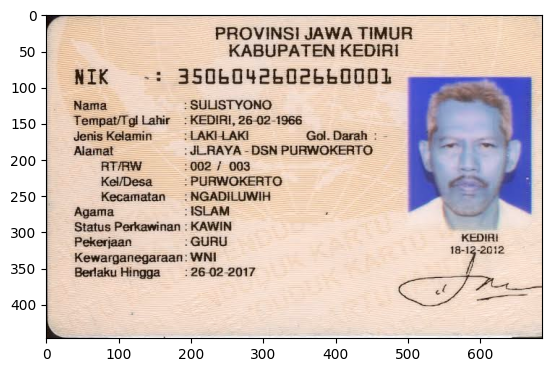

In [11]:
import cv2 as cv
import math
from google.colab.patches import cv2_imshow # for image display
from skimage import io
import matplotlib.pylab as plt
import numpy as np
img = cv.imread('/content/drive/MyDrive/PVCK/KTP.jpeg')
plt.imshow(img)

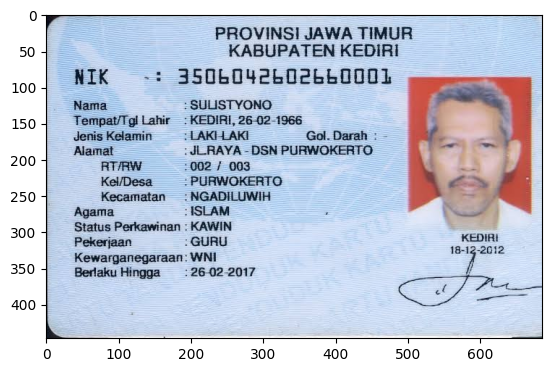

In [3]:
img2 = img
img3 = cv.cvtColor(img,cv.COLOR_BGR2RGB)
plt.imshow(img3)

Mengubah tingkat kecerahan citra 
-----------
Masukkan nilai kecerahan: 50


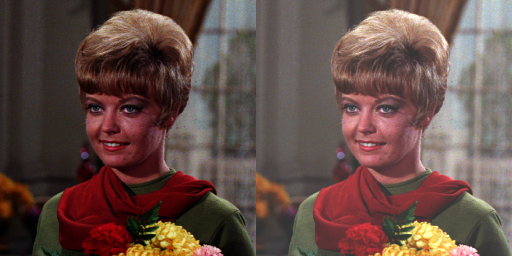

In [8]:
print( 'Mengubah tingkat kecerahan citra ')
print('-----------')
try:
        brightness = int(input('Masukkan nilai kecerahan: ' ))
except ValueError:
          print('Error, not a number')
original = cv.imread('/content/drive/MyDrive/PVCK/female.tiff')
brightness_image = np.zeros(original. shape, original.dtype)
#akses per piksel
for y in range(original.shape[0]):
      for x in range(original.shape[1]):
            for c in range(original.shape[2]):
                      brightness_image[y,x,c] = np. clip (original [y,x,c] + brightness, 8, 255)
#cara simple tanpa for loop
#brightness_image = cv.convertScaleAbs (original, beta-brightness)
final_frame = cv.hconcat((original, brightness_image))
cv2_imshow(final_frame)

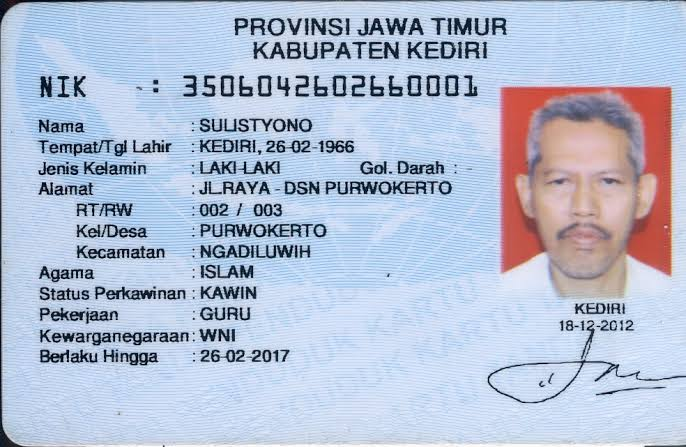

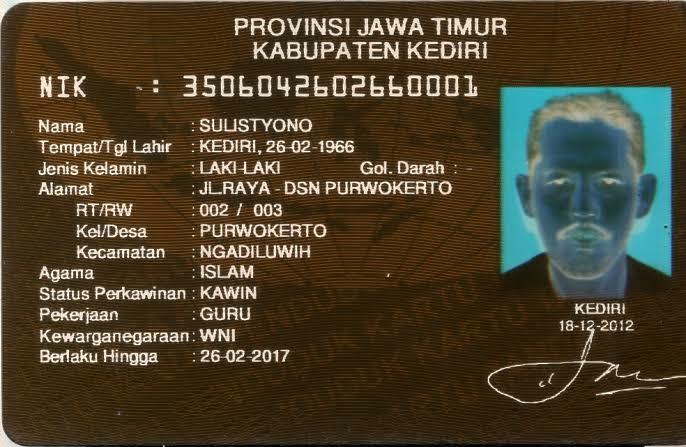

In [9]:
inverted_img = 255 - img
cv2_imshow(img)
cv2_imshow(inverted_img)

Mengubah tingkat kecerahan dan kontras citra
-----------
Masukkan nilai kecerahan (contoh: 1.5 untuk meningkatkan, 0.5 untuk mengurangi): 50
Masukkan nilai kontras (contoh: 1.5 untuk meningkatkan, 0.5 untuk mengurangi): 2


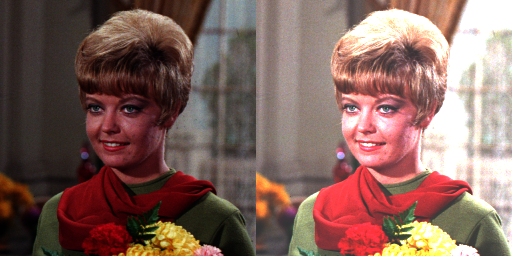

In [10]:
print('Mengubah tingkat kecerahan dan kontras citra')
print('-----------')

try:
    brightness = float(input('Masukkan nilai kecerahan (contoh: 1.5 untuk meningkatkan, 0.5 untuk mengurangi): '))
    contrast = float(input('Masukkan nilai kontras (contoh: 1.5 untuk meningkatkan, 0.5 untuk mengurangi): '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PVCK/female.tiff')

# Menghitung citra yang telah diubah kecerahan dan kontrasnya
brightness_contrast_image = cv.convertScaleAbs(original, alpha=contrast, beta=brightness)

final_frame = cv.hconcat((original, brightness_contrast_image))
cv2_imshow(final_frame)


Transformasi Logaritmik Kecerahan
-----------
Masukkan nilai konstanta (c): 50


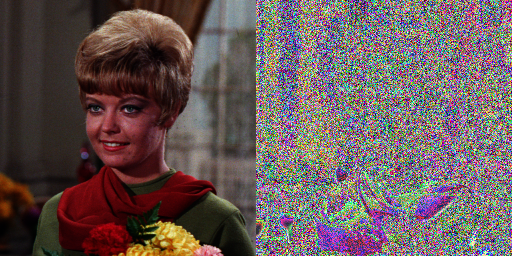

In [20]:
print('Transformasi Logaritmik Kecerahan')
print('-----------')

try:
    c = float(input('Masukkan nilai konstanta (c): '))
except ValueError:
    print('Error, not a number')

original = cv.imread('/content/drive/MyDrive/PVCK/female.tiff')

# Normalisasi rentang piksel ke 0-1
normalized_image = original / 255.0

# Melakukan transformasi logaritmik untuk setiap saluran warna (R, G, B)
log_brightness_image = np.zeros_like(original, dtype=np.float32)
for channel in range(original.shape[-1]):
    log_brightness_image[:, :, channel] = c * np.log1p(normalized_image[:, :, channel])

# Mengonversi gambar hasil kembali ke rentang 0-255
log_brightness_image = (log_brightness_image * 255).astype(np.uint8)

final_frame = np.hstack((original, log_brightness_image))
cv2_imshow(final_frame)
